<font color="red"><h1><b>TO STUDENTS: THIS IS THE STUDENT NOTEBOOK. PLEASE MAKE A COPY OF THIS NOTEBOOK (File > Save a copy in Drive)</b></h1></font>

---



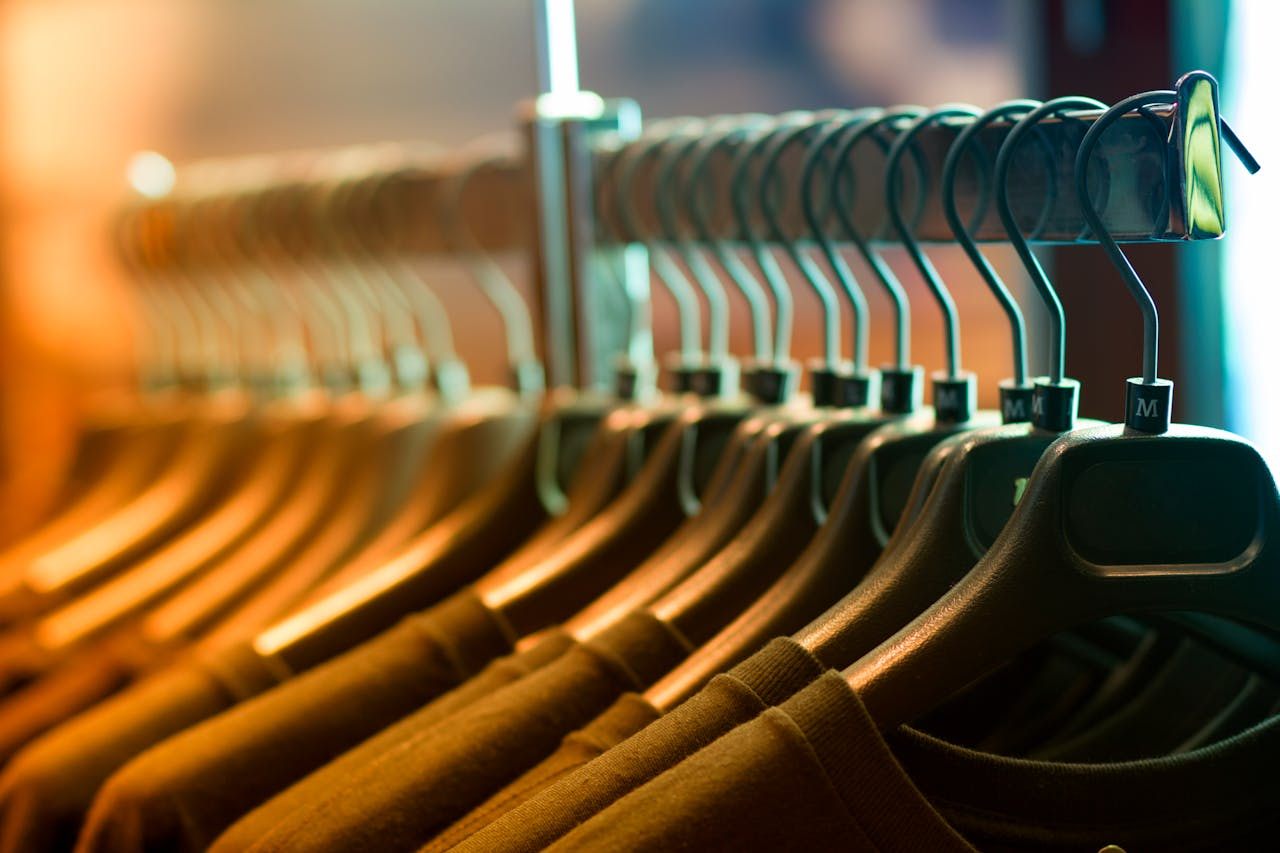

Hi-Tech Fashion is having trouble sorting all their Hi-Fashion clothes. They ask us to build a clothes sorter to organize and ***classify different types of clothes*** so they don't have to do that.


This notebook will go over:

- The Machine Learning Pipeline
  - 🟦Importing
  - 🟧Data Preprocessing
  - 🟩ANN Building
  - 🟥Training
  - 🟪Testing

---

<br>

**Guide to completing this project:**

> ***Sections with bold and italics are instruction prompts you should follow to code***. When in doubt, read the bold and italics

> Codes (🟦🟧🟩🟥🟪) indicate where in the notebook / ML pipeline you are in

> Sections labeled with (⌛) may take longer amounts of time to code

> Click the index (📋) button on the left of your Colab Workspace to see where you are in completing the project

Good luck!
Start by opening up the "ANN Project" block!

#👕 ANN Project

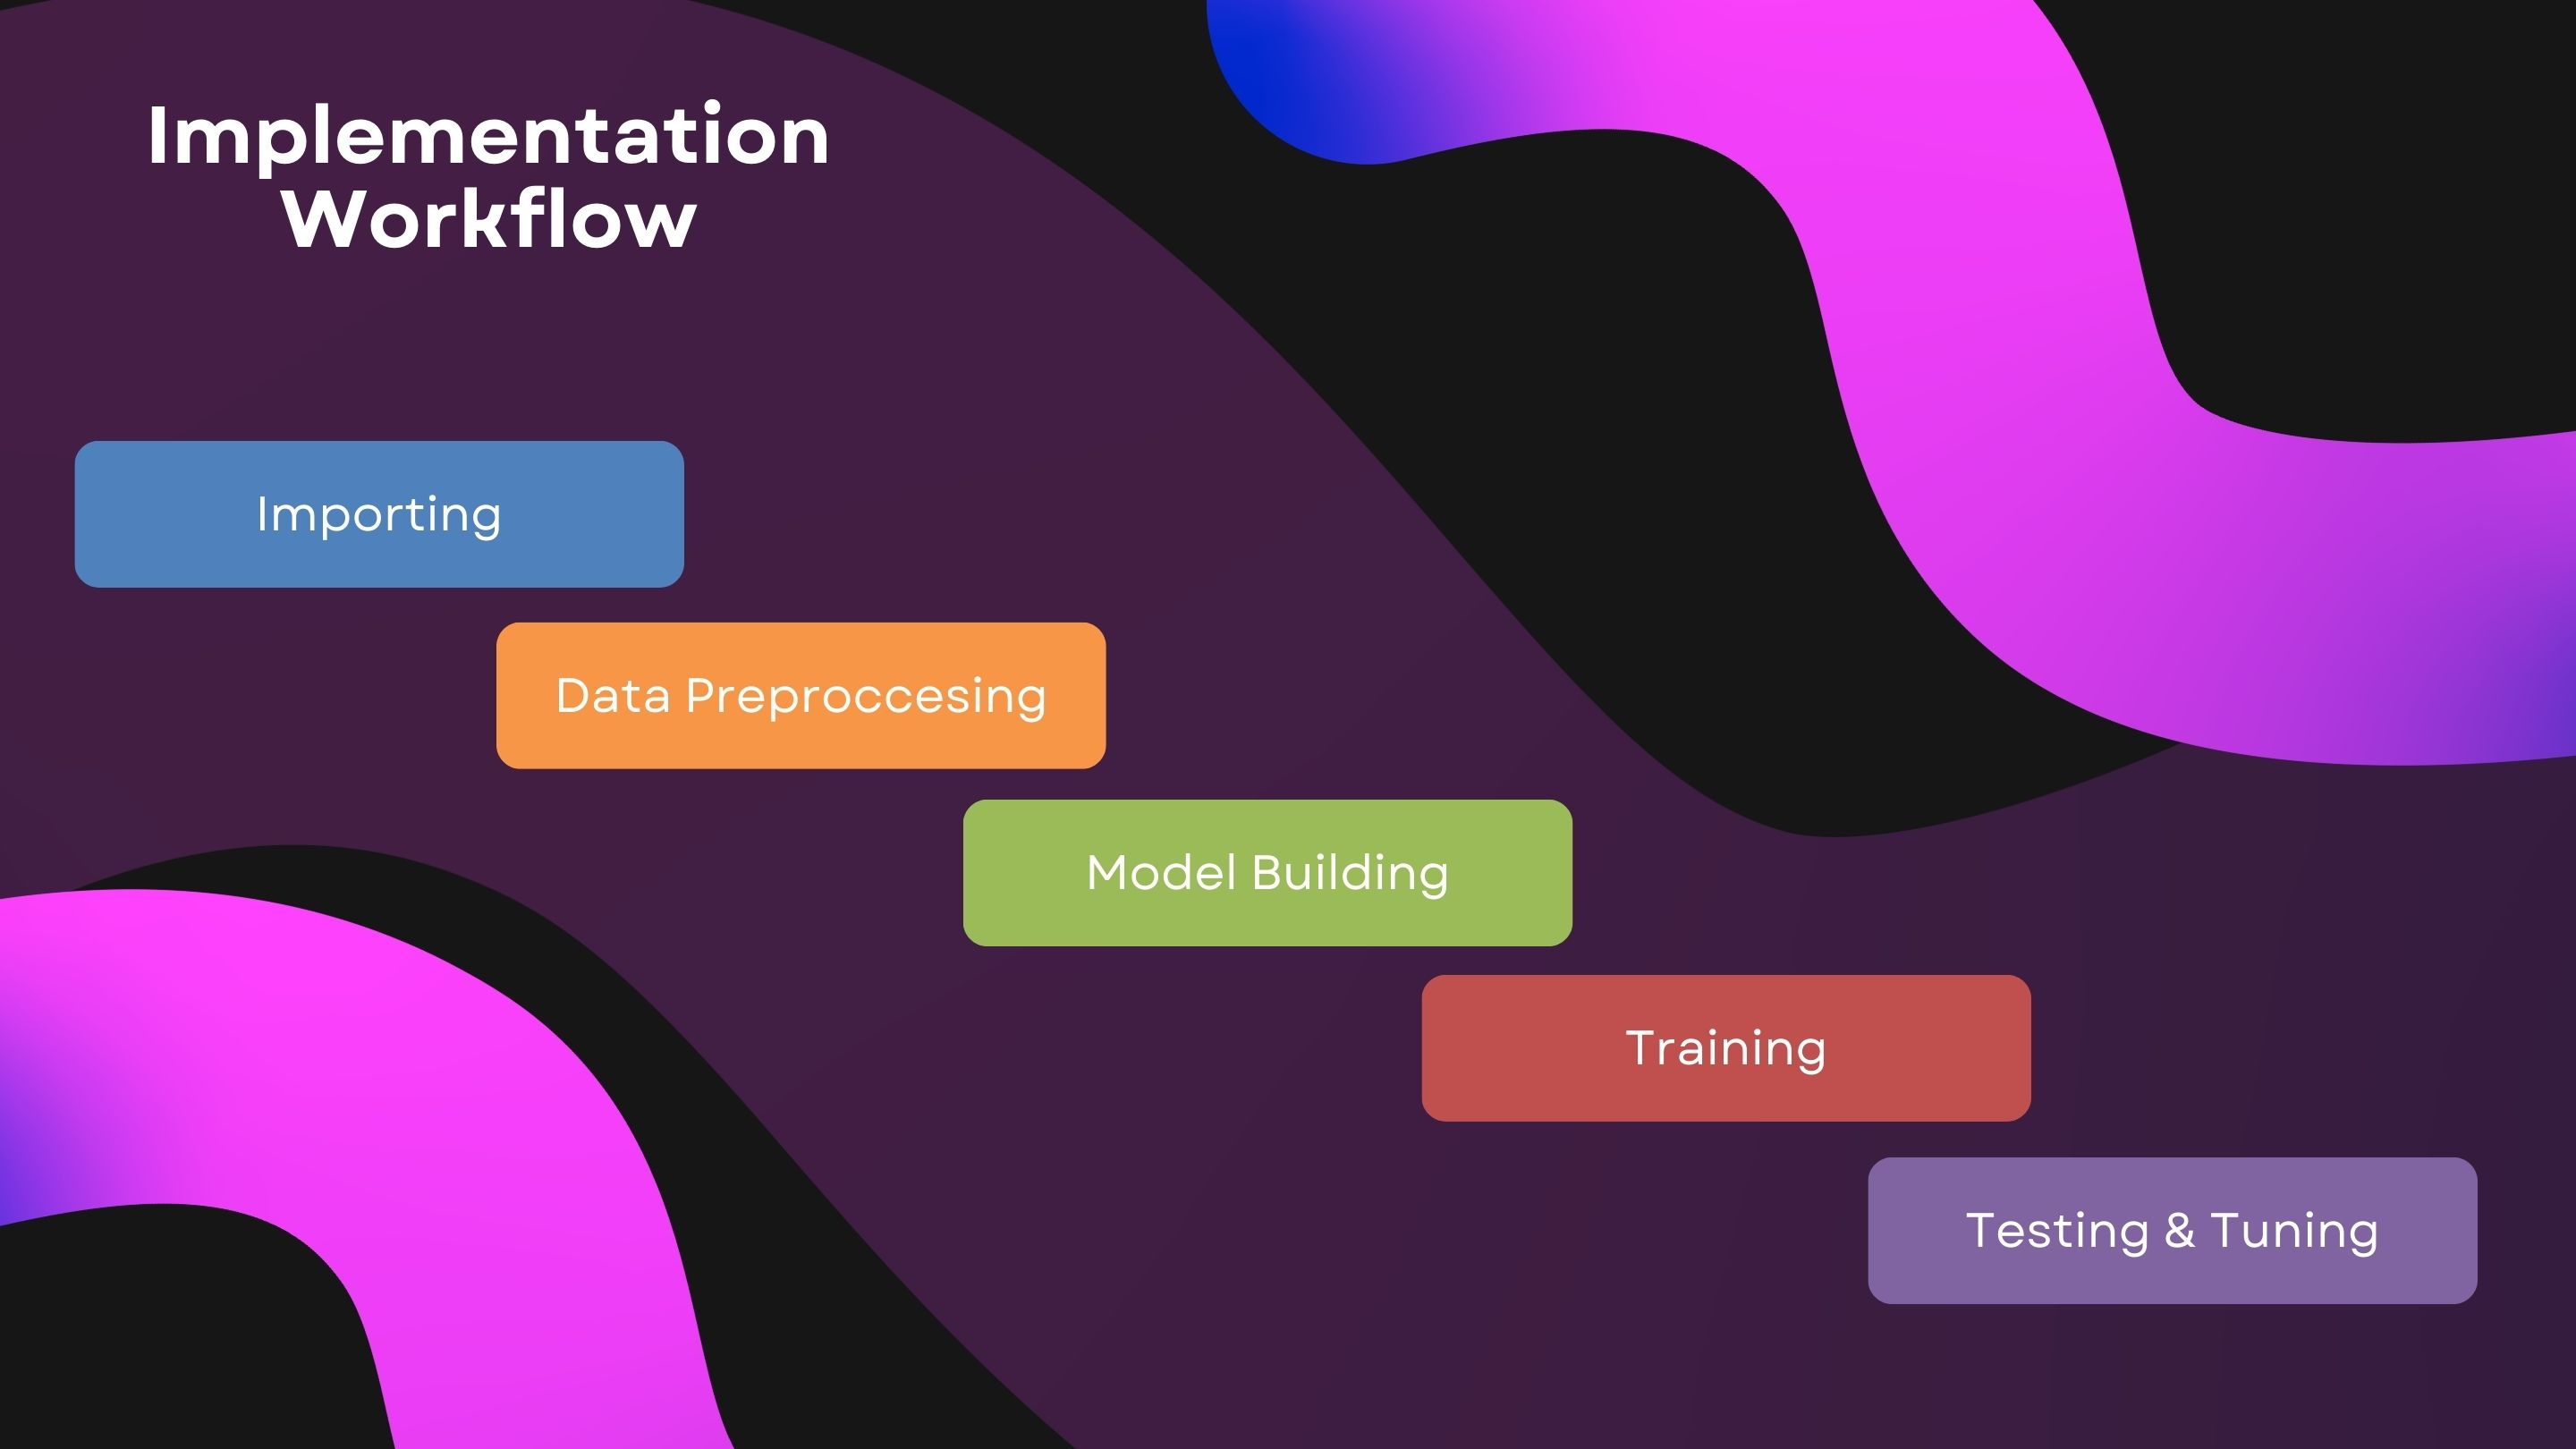

##🟦Importing

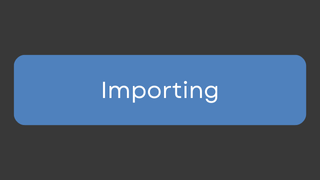

### Imports

We need to import all the libraries we will be using for our PyTorch-based neural network implementation:

>First, ***import `torch`***, which is the core PyTorch library. This is our fundamental package for deep learning, providing the foundation for all tensor operations and computations we'll perform.

>From PyTorch, ***specifically import `torch.nn` as `nn`*** (neural networks). This module contains all the building blocks we need to create neural networks, including layers, activation functions, and loss functions, etc.

>***Also import `torchvision`*** and its submodules: `datasets` and `transforms`. This package is essential for computer vision tasks - `datasets` gives us access to common datasets like MNIST or CIFAR-10, while `transforms` helps us preprocess our images with operations like converting them to tensors (only inport the `ToTensor` functionality).

>A few more things we import are `summary` from the `torchsummary` module and `tqdm` from the `tqdm` module. The former is used to print out a easy-to-understand diagram explaining your model architecture which we'll use after model building, while the latter is used for training and testing loops.

>Finally, ***import `matplotlib`*** for creating visualizations. We import it twice - once `as plt` and once with specific plotting functions (`pyplot`) - to ensure we have access to all plotting capabilities.

***Go and import `torch` and `torch.nn as nn`*** to make the code below work. Afterwards, run the code with the play button [>]

In [1]:
# CODE HERE
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, Subset, Dataset

from torchsummary import summary
from tqdm import tqdm

import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

print(torch.__version__)

2.6.0+cu124


###⌛Dataset Downloading

Hi-Tech Fashion asks us to load the Fashion-MNIST dataset. They tell us some key characteristics:

1. The dataset consists of 70,000 grayscale images of clothing items and accessories:
>60,000 training images
>10,000 test images

2. Each image is 28x28 pixels in grayscale format, making them relatively small and manageable for training

3. The dataset contains 10 different classes of fashion items, labeled from 0 to 9:
>0: T-shirt/top;
>1: Trouser;
>2: Pullover;
>3: Dress;
>4: Coat;
>5: Sandal;
>6: Shirt;
>7: Sneaker;
>8: Bag;
>9: Ankle boot

4. Each class has exactly 6,000 training images and 1,000 test images, making it a perfectly balanced dataset

For more info, they say, visit: https://github.com/zalandoresearch/fashion-mnist



---



Let's load the dataset. This dataset is in the torchvision module (which we previously imported).***So, set your `train_data` equal to `datasets.
FashionMNIST()`.*** In the parameters, you will include:
- `root='data',`
- `train= True,`
- `download=True,`
- `transform=ToTensor(),`
- `target_transform=None,`


***Similarly for `test_data`, set it equal to `datasets.FashionMNIST()`.*** In the parameters, you will include
- `root='data',`
- `train= False,`
- `download=True,`
- `transform=ToTensor(),`
- `target_transform=None,`

In [2]:
# CODE HERE (train_data)
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)
# CODE HERE (test_data)
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 211kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.90MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 6.71MB/s]


## 🟧Data Preprocessing

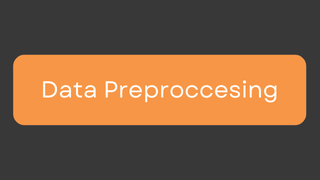

###Data Exploration

Most of our data is already processed. So, lets explore more about this dataset they gave us.

We can use the `len()` method to get the length of our `train_data` and `test_data`. ***Use the `len()` method to print the length of both our datasets.***

We can also use the `.shape` attribute on our datasets (within the `.data` attribute) to see the dimensions of our dataset. ***Use the `.shape` attribute to print the shape of both our datasets.***

In [3]:
# CODE HERE
print(f'Length of the train dataset: {len(train_data)} | Shape of train data {train_data.data.shape}')
print(f'Length of the test dataset: {len(test_data)} | Shape of test data {test_data.data.shape}')

Length of the train dataset: 60000 | Shape of train data torch.Size([60000, 28, 28])
Length of the test dataset: 10000 | Shape of test data torch.Size([10000, 28, 28])


<br>

Let's understand how this train data is formatted:

Our shape of our train data is as follows:

`[60000,28,28]`

> The first number `60000` is the amount of images we have

> The second number `28` is the amount of pixels left to right

> The third number `28` is the amount of pixels down to up

The train dataset is a list (60000 items) of tuples formatted as `[Image, class/label]`
> So... the first 0 indexes the 1st tuple out of 60000 and the 2nd 0 indexes the image (If you index 1 you will get the class number/classification number)

### The First Image

Let's visualize the first image of our dataset. Let's get the shape and the class of it.

<br>

---

<br>

***Use the `.shape` method on `train_data[0][0]` to get the shape of our first image. Then use `train_data[0][1]` to get the class it is in.***

In [4]:
# CODE HERE
print(f'Shape of the first image: {train_data[0][0].shape}')
print(f'Class of the first image: {train_data[0][1]}')

Shape of the first image: torch.Size([1, 28, 28])
Class of the first image: 9


### Visualization

We can also visualize and see what the image is. ***Play around with the code below (change `image_num` on the right) and see what some of the images look like.***

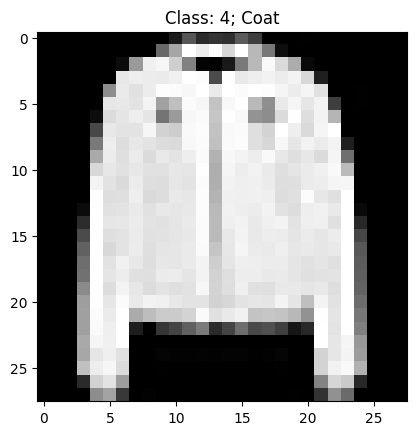

In [5]:
image_num = 9237 #@param {type:"raw"}
plt.imshow(train_data[image_num][0].squeeze(0), cmap='gray') # Visuzlizing grey scale images --> matplotlib takes (H x W), so we need to get rid of the 1 in (1, 28, 28) to make it (28, 28)
plt.title(f'Class: {train_data[image_num][1]}; {train_data.classes[train_data[image_num][1]]}')
plt.show()

### Dataloaders

One step we will have to do in preprocessing is creating Dataloaders. Dataloaders will feed the model bite sized bits of the dataset. You don't want to throw all the material to the model at once, and Hi-Tech Fashion doesn't want us to burn our computing systems.

<br>

---

<br>

***To create the dataloaders, use the `Dataloader()` method to create a train and test dataloader. Input the `train_data` and `test_data`, and a `batch_size=32` for both as parameters. Additionally:***

> Input `shuffle=True` for `train_dataloader`

We shuffle the data in our training dataloader because:

-   Shuffling helps the model learn better by preventing it from seeing data in the same order every epoch
- It reduces overfitting to the sequence of examples
- Ensures the model doesn't learn spurious patterns based on data ordering
- Makes each batch more representative of the overall dataset distribution



> Input `shuffle=False` for `test_dataloader`

We don't shuffle the data in our testing dataloader because:

- We want reproducible results - running evaluation multiple times should give identical outputs
- It's easier to debug and analyze results when you know exactly which samples produced which predictions
- Some evaluation metrics or analyses might depend on maintaining the original order
- There's no learning happening during testing, so shuffling provides no benefit

In [6]:
# CODE HERE
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

<br>

In Dataloaders, we use `iter()` to make an iterable. This allows us to use the `next()` method to retrieve the subsequent next item. ***Make `train_dataloader` an iterable, and use `next()` to get the first item of the dataloader. Then, print the following data:***

- Shape of the image
- Shape of the label
- Number of batches (the 32 length bite-sized chunks)

<br>

---

<br>

TIPS:

- The way iterables work is that when you call the `next()` method, it returns whatever those items in the iterable were. So for example if we had a simple list of fruit:

- `fruits = ['apple','orange','banana']`

- We could make it an iterable and call `next()` on it. This `next()` method will RETURN the fruit it was on.

- `current_fruit = next(iter(fruits))`
- `print(current_fruit)`

- This would return 'apple'! Remember, your `train_dataloader` has two items that will be returned when calling `next()`.


In [7]:
images, labels = next(iter(train_dataloader))
print(f'Shape of the images: {images.shape}')
print(f'Shape of the labels: {labels.shape}')
print(f'Number of batches is: {len(iter(train_dataloader))}') # 32 x 1875 = 60000

Shape of the images: torch.Size([32, 1, 28, 28])
Shape of the labels: torch.Size([32])
Number of batches is: 1875


## 🟩Model Building


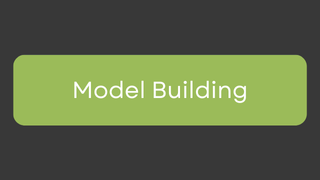

###⌛Building The ANN


Let's create the ANN model. ***Hi-Tech Fashion specifies it should have:***

1. A linear layer of 256 output features
2. A linear layer of 128 output features
3. A linear layer of 32 output features
4. A linear layer of 10 output features (for our 10 different types of clothes)
5. Forward layers for every linear layer

<br>

---
<br>

TIPS:

- Since we have the `torch.nn` as `nn`, you can use `nn` when creating objects from `torch.nn`.

- PyTorch gives us a lot of different resources for us to use. We can simply add layers by typing:

> - nn.Linear()`

- and adding appropriate parameters such as `in_features` and `out_features`.

- When calling `self.layer_1` in your `__init__()`, simply use PyTorch's built in `nn.Linear()` to create linear layers.

- **REMEMBER: the number of `in_features` going into a layer will be the same as the number of `out_features` in the previous layer. The only exception to this is the first layer where your # of input features is the # of samples you have.**

<br>

---
<br>

Then also define a forward pass by creating a `forward` method with additional argument `x`. Then repeatedly set `x` to `self.relu` (passing in each layer of your network sequentially with `x` as input) to apply the ReLU activation function going through each layer. Then set `x` to `self.output` with `x` as the argument, and return `x`


In [8]:
class MultiLayerPerceptron(nn.Module):
  def __init__(self, input_features=784, output=10):
    super().__init__()
    # CODE HERE
    self.layer1 = nn.Linear(in_features=input_features, out_features=256)
    self.layer2 = nn.Linear(in_features=256, out_features=128)
    self.layer3 = nn.Linear(in_features=128, out_features=32)
    self.output = nn.Linear(in_features=32, out_features=output)
    self.relu = nn.ReLU()
  def forward(self, x):
    # CODE HERE
    x = self.relu(self.layer1(x))
    x = self.relu(self.layer2(x))
    x = self.relu(self.layer3(x))
    x = self.output(x)
    return x


We can also use the Sequential API to make this even easier for us! We can type our layers in an easier way without writing so much code:

`self.layers = nn.Sequential(`

`nn.Flatten()`

`nn.Linear(...)`

`nn.Linear(...)`

> The `nn.Linear()` parameters also don't need us to call `in_features` or `out_features`. That means our linear layers can look like this:

> `nn.Linear(256,128)`

We can also call all the forward passes with one command, `return self.layers(x)`.

***Rewrite your code to follow the above implementation. Call your model by creating an instance of it, and call it `model`.***

In [9]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_features=784, output=10):
        super().__init__()
        # CODE HERE
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_features, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, output)
        )
    def forward(self, x):
        return self.layers(x)


model = MultiLayerPerceptron()

### Model Parameters

To have our model work, we also need to call a loss function and optimizer function.

> For loss, because we are doing a classification tasks with 10 distinct classes, we use `nn.CrossEntropyLoss()`
- If we were doing a regression problem, which loss function would we use?
- What about if we were doing a classification task with only 2 classes?

> For optimizer, we use `torch.optim.Adam(params=model.parameters(), lr=0.001)`. Adam is a very common and efficent optimizer, so expect to see it a lot.

***Create new `loss_fn` and `optimizer` variables and assign them their respective functions***

In [10]:
# CODE HERE
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

### Model Summary

Lets see how our model is structured. Use the `summary()` method with the parameters:
- `model`
- `input_size` of `(1,28,28)`

In [11]:
# CODE HERE
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 256]         200,960
              ReLU-3                  [-1, 256]               0
            Linear-4                  [-1, 128]          32,896
              ReLU-5                  [-1, 128]               0
            Linear-6                   [-1, 32]           4,128
              ReLU-7                   [-1, 32]               0
            Linear-8                   [-1, 10]             330
Total params: 238,314
Trainable params: 238,314
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.91
Estimated Total Size (MB): 0.92
----------------------------------------------------------------


## 🟥Training

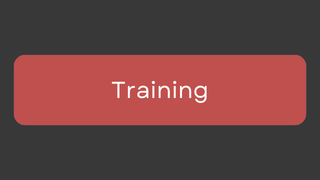

###⌛Model Training



Now we have everything ready to train our model. ***Hi-Tech Fashion says we should:***

1. Make a `train_loop` function with the following parameters: `train_dataloader`, `model`, `loss_fn`, `optimizer`, and `epochs`
2. Putting `model` into train mode by using the `.train()` method
3. Create an array to store our training losses
4. Use a for loop for the epochs and create a `train_loss_epoch` variable set to 0
5. Use a for loop each batch in `train_loader` using a `tdqm` progress bar (use `tdqm()` method with the `train_dataloader` as a parameter)

> Remember that when iterating through `train_dataloader`, we get returned the image and label

6. Set the optimizer's zero gradients using the `.zero_grad()` method
7. Define the `pred` (prediction) using the `model()` function to take in our image
8. Set a loss variable to our `loss_fn()` function (CELoss). Input our `pred` and `label` as parameters
9. Call the backward pass using the loss's `.backward()` method and the optimizer's `.step()` method, then add the `loss.item` to `train_loss_epoch`
10. Get and print the average loss for the epoch (you can get the loss of a singular batch using the `.item()` method on the loss), and append this average loss to `train_loss` (so that the model can 'learn' from its mistakes via gradient descent with our Adam optimizer)
11. Use an f-string to print the current epoch completed and its corresponding loss
12. Return the final loss

In [12]:
def train_loop(train_dataloader, model, loss_fn, optimizer, epochs):
  # CODE HERE (steps 2-3)
  model.train()
  train_loss= []
  for epoch in range(epochs):
    train_loss_epoch = 0
    for image, label in tqdm(train_dataloader, desc="Training Model"): # tqdm means "progress" in Arabic; this enables progress bars

      # CODE HERE (steps 6-9)
        optimizer.zero_grad()
        pred = model(image)
        loss = loss_fn(pred, label)
        loss.backward()
        optimizer.step()
        train_loss_epoch += loss.item()
    # CODE HERE (steps 10-11) - note the indent is different from above
    avg_loss = train_loss_epoch/len(train_dataloader)
    train_loss.append(avg_loss)
    print(f'Epoch: {epoch+1} | loss: {avg_loss:.4f}')

  return train_loss


Now actually train your model using the parameters of the `train_loop()` function and add the correct parameters from objects we already defined. Train 10 epochs so we don't take too long to train, but it still may take some time. ***Train the model, and move to the next task whilst your model trains.***

In [13]:
losses = train_loop(train_dataloader, model, loss_fn, optimizer, epochs=10) # Lets take a few minute break while it trains and we will come back

Training Model: 100%|██████████| 1875/1875 [00:22<00:00, 83.57it/s]


Epoch: 1 | loss: 0.5380


Training Model: 100%|██████████| 1875/1875 [00:22<00:00, 81.93it/s]


Epoch: 2 | loss: 0.3737


Training Model: 100%|██████████| 1875/1875 [00:22<00:00, 82.15it/s]


Epoch: 3 | loss: 0.3341


Training Model: 100%|██████████| 1875/1875 [00:22<00:00, 82.20it/s]


Epoch: 4 | loss: 0.3113


Training Model: 100%|██████████| 1875/1875 [00:22<00:00, 82.41it/s]


Epoch: 5 | loss: 0.2946


Training Model: 100%|██████████| 1875/1875 [00:21<00:00, 85.73it/s]


Epoch: 6 | loss: 0.2800


Training Model: 100%|██████████| 1875/1875 [00:22<00:00, 82.01it/s]


Epoch: 7 | loss: 0.2662


Training Model: 100%|██████████| 1875/1875 [00:23<00:00, 80.84it/s]


Epoch: 8 | loss: 0.2544


Training Model: 100%|██████████| 1875/1875 [00:22<00:00, 83.15it/s]


Epoch: 9 | loss: 0.2445


Training Model: 100%|██████████| 1875/1875 [00:22<00:00, 83.33it/s]

Epoch: 10 | loss: 0.2352


### Loss Graph (If Your Model Finished)

**ONLY RUN IF YOUR MODEL IS FINISHED TRAINING**

Let's visually see how our model did. ***Use the matplotlib `plt` module to help show Hi-Tech Fashion our model loss over epochs.***

<br>



---

<br>

TIPS:

- Here are some essential commands to show plots

- `plt.plot(x,y)` will create a plot of x values and y values

> For example, `plt.plot([1,2,3],[4,5,6])` would plot on the x-axis 1,2,3, and on the y-axis 4,5,6

- `plt.show()`

- Here are some useful commands to make beautiful plots

- `plt.title()` will have the parameter as the label

- `plt.xlabel()` will have the parameter as the label

- `plt.ylabel()` will have the parameter as the label

- You may need to create a list of numbers from 1-11 for your x-axis. Use `list(range(1,11))`.

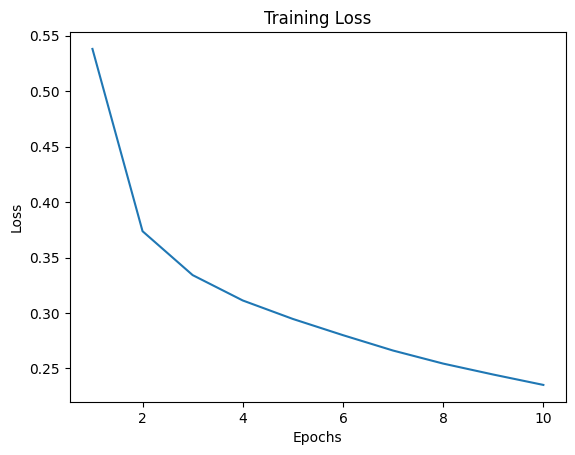

In [14]:
epoch_list = list(range(1, 11))
plt.plot(epoch_list, losses)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Google Drive Integration

Hi-Tech Fashion asks us to have the model saved in Google Drive so they can access it anytime they want. ***To connect to Drive, they asks us to:***
1. Import `drive` `from` `google.colab`
2. Mount the drive using the `drive.mount()` method. Point to the `'/content/drive'` directory

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Lets list everything in the drive using the `!ls` command which is special to Colab. ***Show `"/content/drive/My Drive"`***

*(YOU DO NOT HAVE TO DO THIS IF YOU ARE SCREEN-SHARING)*

(To remove code block outputs, left click the button to the output and delete the output)

In [ ]:
!ls "/content/drive/My Drive"

***Make a directory inside "My Drive" called `nexus_ai_coursework` using the `!mkdir` (make directory) command***


In [18]:
!mkdir "/content/drive/My Drive/nexus_ai_coursework"

mkdir: cannot create directory ‘/content/drive/My Drive/nexus_ai_coursework’: File exists


### Model Saving

***Now save the model using the `.save()` method from `torch`. Save it as `ann.pt` inside the `nexus_ai_coursework` folder***

In [19]:
torch.save(model, '/content/drive/My Drive/nexus_ai_coursework/ann.pt')

### Model Loading

Now we can easily load everything from drive. ***Load the model from `ann.pt` to `new_model` using the `.load()` method (which is equivalent to our previous `model` object except we renamed it as an example if we didn't already have the model loaded)***

In [20]:
new_model = torch.load('/content/drive/My Drive/nexus_ai_coursework/ann.pt', weights_only=False)

## 🟪Testing

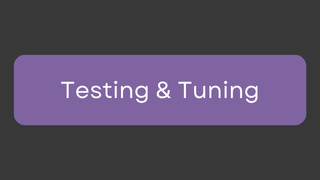

###⌛Model Testing

Now we have everything ready to test our model. ***Hi-Tech Fashion recommends:***

1. Make an `accuracy` function that can calculate the total amount of correct predictions vs. wrong predictions the model makes
2. Make a `test_loop` function with the following parameters: `test_dataloader`, `model`
3. Putting `model` into eval (testing) mode by using the `.eval()` method
4. Define `correct` and `total` which will represent the upcoming predicitions we make
5. Use a `with` statement to specify to not track gradients using the `torch` module's `.no_grad()` method (because we don't need them during testing)
6. Use a for loop each batch in `test_loader` using a `tdqm` progress bar (use `tdqm()` method with the `test_loop` as a parameter)
7. Define the `pred` (prediction) using the `model()` function to take in our image
8. Increase `correct` by one IF the prediction was correct. Always ncrease the total by one
> We can use `pred.argmax(1) == label` to check whether this prediction was the same as it's label. Also use `.type(torch.float).sum().item()` to convert that boolean expression.
9. Use an f-string to print our accuracy using the `accuracy()` function we defined earlier

In [21]:
def accuracy(correct, total):
  return correct/total * 100

def test_loop(test_dataloader, model):
  # CODE HERE (steps 3-4)
  model.eval()
  correct, total = 0, 0

  with torch.no_grad():
    for image, label in tqdm(test_dataloader, desc="Testing Model"):
      # CODE HERE (steps 7-8)
      pred = model(image)
      correct += (pred.argmax(1) == label).type(torch.float).sum().item()
      total += len(label)
  print(f'Accuracy: {accuracy(correct, total)}%')
    # CODE HERE (step 9) - note the indent is different

Now actually test your model using the parameters of the `test_loop()` function and add the correct parameters from objects we already defined. ***Test the model.***

In [22]:
test_loop(test_dataloader, model)

Testing Model: 100%|██████████| 313/313 [00:01<00:00, 178.67it/s]

Accuracy: 88.16000000000001%


Let's give Hi-Tech Fashion a a demo of our ANN classifier. ***Play around with our model and see whether you think the predictions it makes are correct!***

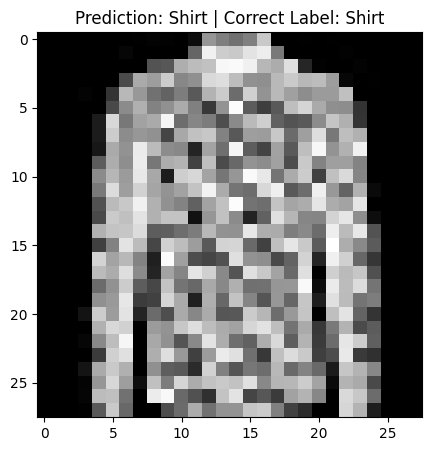

In [23]:
rand_idx = torch.randint(0, len(test_data), (1,)).item()
image, label = test_data[rand_idx]

prediction = model(image)

# Get the predicted class index
pred_idx = prediction[0].argmax().item()  # For first image in batch

plt.figure(figsize=(5,5))
plt.title(f'Prediction: {test_data.classes[pred_idx]} | Correct Label: {test_data.classes[label]}')
plt.imshow(image[0].squeeze(), cmap='gray')  # Show first image in batch
plt.show()

### Hyperparameter Tuning

There's still a lot we can do to improve the model. Some notable ways are to:

- Change learning rate (`lr`)
- Change number of epochs and see when the loss converges (flattens)
- Adding more Linear layers (`nn.Linear()`)

#📝Homework


<img src="https://storage.googleapis.com/kaggle-datasets-images/3258/5337/0dade1b95b22cceac471b309fc8a8f63/dataset-cover.png" alt="Sign Language Dataset">

Google Colab Link:
https://colab.research.google.com/drive/11vVSAq7bByLdQH712GBxQXMlFi_IkS8B